# **Football Data Task 3 : StatsBombPy and MPLSoccer Data Visualisation** #

### **Background** ###
This notebook provides a step by step guide to accessing football data provided by StatsBomb and then using the python library MPLSoccer to visualise the data. In this notebook we will work through two examples. 

### **Example 1 : Tottenham vs Arsenal - Arsenal Pass Map** ###

The first example will gather the data directly from the StatsBomb python library. In this example we will focus on the iconic Arsenal Invincible team from the 2003/2004 Premier League season. We will focus on the Tottenham vs Arsenal game played on 25/04/2004. We will retrieve data on passes made by Arsenal players and then analyse this data to visualise a 'Pass Map'.
<br>

#### **Step by Step Guide** ####
Here’s a step-by-step breakdown of the process:
<br>

1) **Import Libraries :** Import the relevant libraries for both of the tasks, some may require pip installs. 

2) **Explore Competitions**: List all available football competitions using the statsbombpy library.

3) **Explore Matches**: Filter and display matches from the 2003/2004 English Premier League season.

4) **Retrieve Match Events**: Obtain detailed event data for the Arsenal vs. Tottenham match.

5) **Filter Pass Events**: Extract only the pass events and store them in a DataFrame.

6) **Visualize Passes**: Plot the passes on a pitch to create a detailed pass map.
<br>

### **Example 2 : Liverpool vs Arsenal - Possession Chart** ###

The second example will load raw JSON data directly from the StatsBombPy Github repository. In this example, we will analyze the Liverpool vs. Arsenal match from the same season played on 04/10/2003. We will retrieve match event data containing possession information and visualise a 'Possession Chart' to display this data for both teams. 
<br>

#### **Step by Step Guide** ####
Here’s a step-by-step guide to the process:
<br> 

1) **Explore Matches**: Access and list all matches from the 2003/2004 season by loading data directly from GitHub and explore the data. 

2) **Load Match Events**: Retrieve the specific match events from the JSON file and store them in a DataFrame.

3) **Adjust Data for Visualization**: Convert Arsenal’s event durations to negative values for effective plotting on a possession chart.

4) **Create Possession Chart**: Construct and format a possession chart that visualizes both teams' ball possession throughout the match.

<br>
By following these two approaches, you'll gain a comprehensive understanding of how to extract data from StatsBomb and visualize it using the mplsoccer library in Python.

## **Example 1 : Tottenham vs Arsenal - Arsenal Pass Map** ##

In [1]:
# Imports
from statsbombpy import sb
import matplotlib.pyplot as plt 
from mplsoccer.pitch import Pitch 
import pandas as pd 
from pandas import json_normalize
import numpy as np 
import requests


In [2]:
# Exploring all of the competitions available on statsbombpy
sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
69               male              False                       True   
70               male              False                      False   
71             female              False                       True   
72             female              False                       True   
73             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-07-15T14:15:54.671676  2024-07-15T14:17:00.877356   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-06-13T07:51:02.452825                        None   
3    2018/2019  2024-06-12T07:44:38.559714     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   
70   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
71        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
72        2023  2024-07-14T16:59:48.469596  2024-07-14T17:01:38.887279   
73        2019  2024-02-13T09:41:26.379767     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2024-07-15T14:17:00.877356  2024-07-15T14:15:54.671676  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-06-13T07:51:02.452825  
3                         None  2024-06-12T07:44:38.559714  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  
70                        None  2024-02-12T14:45:05.702250  
71  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
72  2024-07-14T17:01:38.887279  2024-07-14T16:59:48.469596  
73                        None  2024-02-13T09:41:26.379767  

[74 rows x 12 columns]

In [3]:
# Exploring all matches played in the 2003/2004 EPL season
sb.matches(competition_id = 2, season_id = 44)

match_id  match_date      kick_off               competition     season  \
0    3749052  2004-02-07  16:00:00.000  England - Premier League  2003/2004   
1    3749522  2003-12-26  13:00:00.000  England - Premier League  2003/2004   
2    3749246  2004-03-28  17:05:00.000  England - Premier League  2003/2004   
3    3749257  2004-05-15  16:00:00.000  England - Premier League  2003/2004   
4    3749642  2004-02-28  16:00:00.000  England - Premier League  2003/2004   
5    3749358  2003-08-24  17:05:00.000  England - Premier League  2003/2004   
6    3749346  2003-11-01  16:00:00.000  England - Premier League  2003/2004   
7    3749253  2003-10-04  13:30:00.000  England - Premier League  2003/2004   
8    3749079  2003-10-18  16:00:00.000  England - Premier League  2003/2004   
9    3749465  2004-03-13  16:00:00.000  England - Premier League  2003/2004   
10   3749133  2004-01-18  15:00:00.000  England - Premier League  2003/2004   
11   3749528  2003-09-26  21:00:00.000  England - Premier League  2003/2004   
12   3749233  2004-02-01  17:05:00.000  England - Premier League  2003/2004   
13   3749462  2004-05-01  13:30:00.000  England - Premier League  2003/2004   
14   3749552  2003-09-21  17:05:00.000  England - Premier League  2003/2004   
15   3749296  2003-09-13  16:00:00.000  England - Premier League  2003/2004   
16   3749454  2003-08-31  17:05:00.000  England - Premier League  2003/2004   
17   3749276  2004-02-21  13:30:00.000  England - Premier League  2003/2004   
18   3749068  2004-04-25  17:05:00.000  England - Premier League  2003/2004   
19   3749310  2003-12-29  21:00:00.000  England - Premier League  2003/2004   
20   3749493  2003-08-16  16:00:00.000  England - Premier League  2003/2004   
21   3749434  2003-11-22  16:00:00.000  England - Premier League  2003/2004   
22   3749192  2003-11-30  15:00:00.000  England - Premier League  2003/2004   
23   3749196  2003-11-08  16:00:00.000  England - Premier League  2003/2004   
24   3749448  2004-04-09  13:30:00.000  England - Premier League  2003/2004   
25   3749360  2003-12-14  15:00:00.000  England - Premier League  2003/2004   
26   3749453  2004-04-16  21:00:00.000  England - Premier League  2003/2004   
27   3749278  2003-12-20  16:00:00.000  England - Premier League  2003/2004   
28   3749603  2004-05-09  17:05:00.000  England - Premier League  2003/2004   
29   3749274  2004-05-04  21:00:00.000  England - Premier League  2003/2004   
30   3749590  2003-12-06  16:00:00.000  England - Premier League  2003/2004   
31   3749631  2004-02-10  20:45:00.000  England - Premier League  2003/2004   
32   3749117  2004-01-07  21:00:00.000  England - Premier League  2003/2004   
33   3749108  2003-08-27  20:45:00.000  England - Premier League  2003/2004   
34   3749153  2004-01-10  16:00:00.000  England - Premier League  2003/2004   
35   3749403  2004-03-20  16:00:00.000  England - Premier League  2003/2004   
36   3749526  2003-10-26  15:00:00.000  England - Premier League  2003/2004   
37   3749431  2004-04-11  17:05:00.000  England - Premier League  2003/2004   

                  home_team                away_team  home_score  away_score  \
0   Wolverhampton Wanderers                  Arsenal           1           3   
1                   Arsenal  Wolverhampton Wanderers           3           0   
2                   Arsenal        Manchester United           1           1   
3                   Arsenal           Leicester City           2           1   
4                   Arsenal        Charlton Athletic           2           1   
5             Middlesbrough                  Arsenal           0           4   
6              Leeds United                  Arsenal           1           4   
7                 Liverpool                  Arsenal           1           2   
8                   Arsenal                  Chelsea           2           1   
9          Blackburn Rovers                  Arsenal           0           2   
10              Aston Villa               

In [4]:
# Obtaining event data for our specified match 
# Notice there are None values across our dataset. Some columns are irrelevant for some events
events = sb.events(match_id = 3749068)

# Take a look at the data 
events.head()

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0   NaN                NaN                  NaN                     NaN   
1   NaN                NaN                  NaN                     NaN   
2   NaN                NaN                  NaN                     NaN   
3   NaN                NaN                  NaN                     NaN   
4   NaN                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure block_offensive carry_end_location  \
0                            NaN             NaN                NaN   
1                            NaN             NaN                NaN   
2                            NaN             NaN                NaN   
3                            NaN             NaN                NaN   
4                            NaN             NaN                NaN   

  clearance_aerial_won clearance_body_part clearance_head  ...  \
0                  NaN                 NaN            NaN  ...   
1                  NaN                 NaN            NaN  ...   
2                  NaN                 NaN            NaN  ...   
3                  NaN                 NaN            NaN  ...   
4                  NaN                 NaN            NaN  ...   

  substitution_outcome substitution_outcome_id substitution_replacement  \
0                  NaN                     NaN                      NaN   
1                  NaN                     NaN                      NaN   
2                  NaN                     NaN                      NaN   
3                  NaN                     NaN                      NaN   
4                  NaN                     NaN                      NaN   

  substitution_replacement_id  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   

                                             tactics               team  \
0  {'formation': 442, 'lineup': [{'player': {'id'...  Tottenham Hotspur   
1  {'formation': 442, 'lineup': [{'player': {'id'...            Arsenal   
2                                                NaN  Tottenham Hotspur   
3                                                NaN            Arsenal   
4                                                NaN            Arsenal   

  team_id     timestamp         type under_pressure  
0      38  00:00:00.000  Starting XI            NaN  
1       1  00:00:00.000  Starting XI            NaN  
2      38  00:00:00.000   Half Start            NaN  
3       1  00:00:00.000   Half Start            NaN  
4       1  00:00:00.000   Half Start            NaN  

[5 rows x 97 columns]

In [5]:
# Retrieving a list of column names in our dataset
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'half_start_late_video_start', 'id', 'index', 'interception_outcome',
       'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_as

In [6]:
# Refining the data set to contain the columns we need in order to make the pass map 
df= events[['id','team', 'player', 'period', 'minute', 'type', 'location', 'pass_end_location', 'pass_outcome']]
df = df[df['team']=='Arsenal']
df


id     team  \
1     63a6191e-5ce1-49e4-b9aa-50fe3eff8dbc  Arsenal   
3     e66c505a-6527-4b48-9a18-49342236a174  Arsenal   
4     2fc10e50-88a1-4d38-a5d5-a479354a9eb3  Arsenal   
6     97b105a7-ec07-4fc2-95d6-f86dbcac4f2a  Arsenal   
7     c2b9151c-6593-48b7-822b-6ad1b9b2e196  Arsenal   
...                                    ...      ...   
3144  0cdb0a01-5804-46aa-b9f8-763bc6523463  Arsenal   
3147  d4d7bebe-cde1-4f90-be3c-e89e54555ec4  Arsenal   
3149  7900f48c-1308-4aa5-9ec8-37af5c06a6d7  Arsenal   
3151  aadbaa29-12b5-4a97-8cd4-897fff0236c4  Arsenal   
3153  582e2dba-b24a-4c21-b0e6-7f1236837790  Arsenal   

                          player  period  minute          type      location  \
1                            NaN       1       0   Starting XI           NaN   
3                            NaN       1       0    Half Start           NaN   
4                            NaN       2      45    Half Start           NaN   
6                  Thierry Henry       1       0          Pass  [60.0, 40.0]   
7                Dennis Bergkamp       1       0          Pass  [62.0, 43.5]   
...                          ...     ...     ...           ...           ...   
3144                         NaN       1      46      Half End           NaN   
3147                         NaN       2      97      Half End           NaN   
3149                 Ray Parlour       2      66  Substitution           NaN   
3151             Dennis Bergkamp       2      80  Substitution           NaN   
3153  Laureano Bisan-Etame Mayer       2      75         Error  [10.7, 76.3]   

     pass_end_location pass_outcome  
1                  NaN          NaN  
3                  NaN          NaN  
4                  NaN          NaN  
6         [62.3, 43.5]          NaN  
7         [47.2, 30.7]          NaN  
...                ...          ...  
3144               NaN          NaN  
3147               NaN          NaN  
3149               NaN          NaN  
3151               NaN          NaN  
3153               NaN          NaN  

[1612 rows x 9 columns]

In [7]:
# Checking the different types of events in our DataFrame 
df['type'].value_counts()

type
Pass              451
Ball Receipt*     419
Carry             361
Pressure           91
Ball Recovery      53
Duel               52
Clearance          48
Foul Committed     19
Dispossessed       17
Goal Keeper        17
Dribble            16
Block              15
Foul Won           13
Dribbled Past       9
Shot                9
Miscontrol          7
Interception        4
Half Start          2
Half End            2
50/50               2
Substitution        2
Starting XI         1
Offside             1
Error               1
Name: count, dtype: int64

In [8]:
# Getting the pass data for Arsenal only
df = df[df['type']=='Pass']
df

id     team  \
6    97b105a7-ec07-4fc2-95d6-f86dbcac4f2a  Arsenal   
7    c2b9151c-6593-48b7-822b-6ad1b9b2e196  Arsenal   
8    99435c81-dc82-45aa-a2af-ddf33eb3bf8c  Arsenal   
9    c721366f-05e3-4832-ba98-08e34c426bf7  Arsenal   
10   032fcd19-fc29-4e17-b343-356aa03fb5d9  Arsenal   
..                                    ...      ...   
878  e9b5edd3-5552-4c4c-a59e-555c021f908f  Arsenal   
879  269a90f8-6769-48ae-8e4a-3cddca5c5c5b  Arsenal   
880  bd42cd5b-a97d-4aac-93d3-088c1c915ae7  Arsenal   
881  63d3bab1-9ad2-4e3a-b13a-9317017ad7c0  Arsenal   
883  1e6c792c-5d45-4518-9b42-3562f5f7a98d  Arsenal   

                               player  period  minute  type      location  \
6                       Thierry Henry       1       0  Pass  [60.0, 40.0]   
7                     Dennis Bergkamp       1       0  Pass  [62.0, 43.5]   
8                      Patrick Vieira       1       0  Pass  [47.2, 29.5]   
9                         Ashley Cole       1       0  Pass  [38.2, 12.1]   
10   Sulzeer Jeremiah ''Sol' Campbell       1       0  Pass  [28.8, 29.5]   
..                                ...     ...     ...   ...           ...   
878                     Thierry Henry       2      96  Pass  [59.9, 39.9]   
879        Laureano Bisan-Etame Mayer       2      96  Pass  [46.4, 60.1]   
880  Sulzeer Jeremiah ''Sol' Campbell       2      96  Pass  [40.1, 38.9]   
881                      Robert Pirès       2      96  Pass  [63.1, 10.3]   
883                      Jens Lehmann       2      96  Pass   [7.0, 36.1]   

    pass_end_location pass_outcome  
6        [62.3, 43.5]          NaN  
7        [47.2, 30.7]          NaN  
8        [38.2, 12.1]          NaN  
9        [31.7, 26.3]          NaN  
10       [48.4, 38.8]          NaN  
..                ...          ...  
878      [46.4, 60.1]          NaN  
879      [40.3, 38.9]          NaN  
880      [49.5, 10.3]          NaN  
881      [84.2, 36.5]   Incomplete  
883      [70.0, 15.2]      Unknown  

[451 rows x 9 columns]

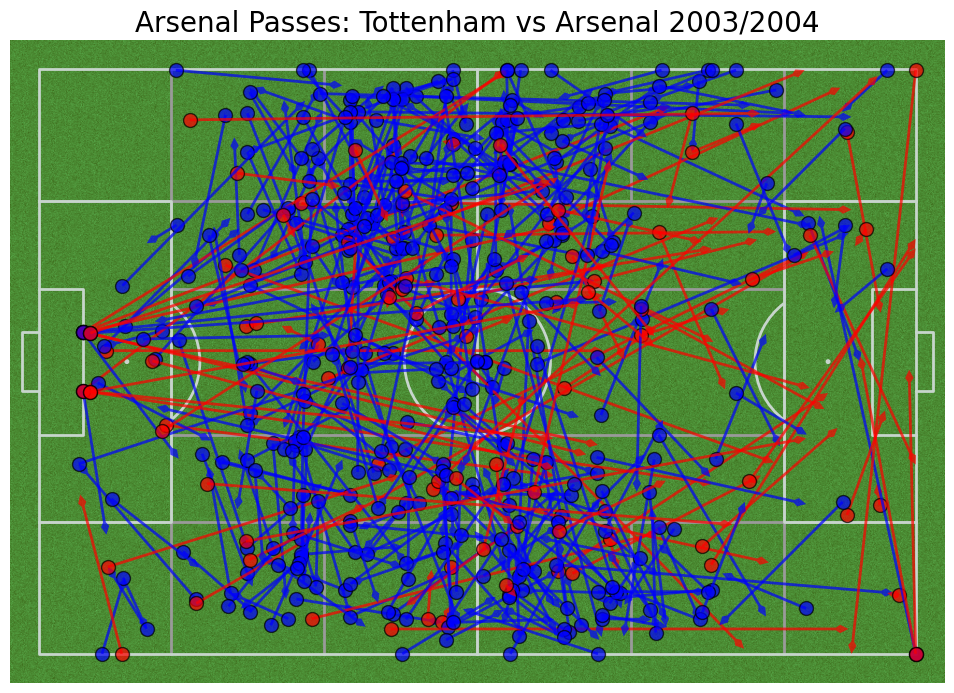

In [9]:
# Now we can begin to visualise the data by forming our pass map
# First we draw a pitch using the mplsoccer pitch library
pitch = Pitch(pitch_type='statsbomb', positional = True, positional_color = '#9A9A9A', pitch_color='grass', line_color='#c7d5cc', goal_type='box')
fig, ax = pitch.draw(figsize=(10, 7))

# Loop through each row to plot the passes
for x in range(len(df['id'])):
    if df['period'].iloc[x] == 1 or df['period'].iloc[x] == 2:
        # Determine the color based on pass outcome
        if df['pass_outcome'].iloc[x] in ['Incomplete', 'Unknown', 'Injury Clearance', 'Out', 'Pass Offside']:
            color = 'red'
        else:
            color = 'blue'
        
        # Draw the pass arrow
        pitch.arrows(df['location'].iloc[x][0], df['location'].iloc[x][1],
                     df['pass_end_location'].iloc[x][0], df['pass_end_location'].iloc[x][1],
                     color=color, width=2, headwidth=3, headlength=3, alpha=0.7, ax=ax)
        
        # Mark the start location of the pass
        pitch.scatter(df['location'].iloc[x][0], df['location'].iloc[x][1],
                      color=color, s=100, edgecolors='black', ax=ax, alpha=0.7)

# Set title
plt.title('Arsenal Passes: Tottenham vs Arsenal 2003/2004', color='black', size=20)

# Display the pass map
plt.show()

## **Example 1 : Liverpool vs Arsenal - Possession Chart** ##

In [10]:
# We can also retrieve season data by accessing raw JSON data from the StatsBomb GitHub Repository
matches=  requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/2/44.json')
matches = matches.json()
matches 

[{'match_id': 3749052,
  'match_date': '2004-02-07',
  'kick_off': '16:00:00.000',
  'competition': {'competition_id': 2,
   'country_name': 'England',
   'competition_name': 'Premier League'},
  'season': {'season_id': 44, 'season_name': '2003/2004'},
  'home_team': {'home_team_id': 46,
   'home_team_name': 'Wolverhampton Wanderers',
   'home_team_gender': 'male',
   'home_team_group': None,
   'country': {'id': 68, 'name': 'England'},
   'managers': [{'id': 3602,
     'name': 'Dave Jones',
     'nickname': None,
     'dob': '1956-08-17',
     'country': {'id': 68, 'name': 'England'}}]},
  'away_team': {'away_team_id': 1,
   'away_team_name': 'Arsenal',
   'away_team_gender': 'male',
   'away_team_group': None,
   'country': {'id': 68, 'name': 'England'},
   'managers': [{'id': 577,
     'name': 'Arsène Wenger',
     'nickname': None,
     'dob': '1949-10-22',
     'country': {'id': 78, 'name': 'France'}}]},
  'home_score': 1,
  'away_score': 3,
  'match_status': 'available',
  'match

In [11]:
# We can also access match events using the same method
events2 = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3749253.json')
events2 = events2.json()
events2

[{'id': 'a950af48-8f29-480a-874a-acf74f6da9a6',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 24, 'name': 'Liverpool'},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 24, 'name': 'Liverpool'},
  'duration': 0.0,
  'tactics': {'formation': 442,
   'lineup': [{'player': {'id': 34390, 'name': 'Jerzy Dudek'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 0},
    {'player': {'id': 34392, 'name': 'Steve Finnan'},
     'position': {'id': 2, 'name': 'Right Back'},
     'jersey_number': 0},
    {'player': {'id': 40254, 'name': 'Igor Bišćan'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 0},
    {'player': {'id': 34389, 'name': 'Sami Hyypiä'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 0},
    {'player': {'id': 34386, 'name': 'John Arne Semundset

In [12]:
# We can then transform the JSON data into a pandas DataFrame
df2 = json_normalize(events2)

# The dataset contains a large amount of columns, this opptions allows us to display all columns 
pd.set_option('display.max.columns', None)

# Take a peak at the data 
df2.head()


id  index  period     timestamp  minute  \
0  a950af48-8f29-480a-874a-acf74f6da9a6      1       1  00:00:00.000       0   
1  c2c09003-c0b4-45e8-80bf-1be9c57ba7a9      2       1  00:00:00.000       0   
2  e2df48eb-3634-43ec-a807-b355a69b0736      3       1  00:00:00.000       0   
3  0a5902a8-3b18-40d7-bd42-6c687465479e      4       1  00:00:00.000       0   
4  7ddf406e-8286-41d7-af42-89ed25a523da      5       1  00:00:00.986       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                  24   
1       0           1  0.000000       35  Starting XI                  24   
2       0           1  0.000000       18   Half Start                  24   
3       0           1  0.000000       18   Half Start                  24   
4       0           2  0.934813       30         Pass                   1   

  possession_team.name  play_pattern.id play_pattern.name  team.id  team.name  \
0            Liverpool                1      Regular Play       24  Liverpool   
1            Liverpool                1      Regular Play        1    Arsenal   
2            Liverpool                1      Regular Play        1    Arsenal   
3            Liverpool                1      Regular Play       24  Liverpool   
4              Arsenal                9     From Kick Off        1    Arsenal   

   tactics.formation                                     tactics.lineup  \
0              442.0  [{'player': {'id': 34390, 'name': 'Jerzy Dudek...   
1              442.0  [{'player': {'id': 20015, 'name': 'Jens Lehman...   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [0a5902a8-3b18-40d7-bd42-6c687465479e]           NaN        NaN   
3  [e2df48eb-3634-43ec-a807-b355a69b0736]           NaN        NaN   
4  [7b8cb53f-163e-48e1-996b-181b5a7a5ab3]  [60.0, 40.0]    40255.0   

         player.name  position.id         position.name  pass.recipient.id  \
0                NaN          NaN                   NaN                NaN   
1                NaN          NaN                   NaN                NaN   
2                NaN          NaN                   NaN                NaN   
3                NaN          NaN                   NaN                NaN   
4  Jérémie Aliadière         22.0  Right Center Forward            15516.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4       Thierry Henry          1.7    0.489957             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [61.5, 40.8]               40.0          Right Foot   

   pass.type.id pass.type.name carry.end_location under_pressure  \
0           NaN            NaN                NaN            NaN   
1           NaN            NaN                NaN            NaN   
2           NaN            NaN                NaN            NaN   
3           NaN            NaN                NaN            NaN   
4          65.0       Kick Off                NaN    

In [13]:
# Change the duration of Arsenal's match events to negative values. This adjustment allows us to plot both teams' data on the same axis, differentiating between Arsenal and Liverpool’s possessions.
for x in range(len(df2['index'])) : 
    if (df2['possession_team.id'].iloc[x] == 1) : 
        df2.duration.iloc[x] = df2.duration.iloc[x]*(-1)

# Take a look at the data 
df2.head()

/var/folders/yg/fnwdsjlx7xq5vmjg5ddqfbc00000gn/T/ipykernel_98390/350875070.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2.duration.iloc[x] = df2.duration.iloc[x]*(-1)
/var/folders/yg/fnwdsjlx7xq5vmjg5ddqfbc00000gn/T/ipykernel_98390/

id  index  period     timestamp  minute  \
0  a950af48-8f29-480a-874a-acf74f6da9a6      1       1  00:00:00.000       0   
1  c2c09003-c0b4-45e8-80bf-1be9c57ba7a9      2       1  00:00:00.000       0   
2  e2df48eb-3634-43ec-a807-b355a69b0736      3       1  00:00:00.000       0   
3  0a5902a8-3b18-40d7-bd42-6c687465479e      4       1  00:00:00.000       0   
4  7ddf406e-8286-41d7-af42-89ed25a523da      5       1  00:00:00.986       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                  24   
1       0           1  0.000000       35  Starting XI                  24   
2       0           1  0.000000       18   Half Start                  24   
3       0           1  0.000000       18   Half Start                  24   
4       0           2 -0.934813       30         Pass                   1   

  possession_team.name  play_pattern.id play_pattern.name  team.id  team.name  \
0            Liverpool                1      Regular Play       24  Liverpool   
1            Liverpool                1      Regular Play        1    Arsenal   
2            Liverpool                1      Regular Play        1    Arsenal   
3            Liverpool                1      Regular Play       24  Liverpool   
4              Arsenal                9     From Kick Off        1    Arsenal   

   tactics.formation                                     tactics.lineup  \
0              442.0  [{'player': {'id': 34390, 'name': 'Jerzy Dudek...   
1              442.0  [{'player': {'id': 20015, 'name': 'Jens Lehman...   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [0a5902a8-3b18-40d7-bd42-6c687465479e]           NaN        NaN   
3  [e2df48eb-3634-43ec-a807-b355a69b0736]           NaN        NaN   
4  [7b8cb53f-163e-48e1-996b-181b5a7a5ab3]  [60.0, 40.0]    40255.0   

         player.name  position.id         position.name  pass.recipient.id  \
0                NaN          NaN                   NaN                NaN   
1                NaN          NaN                   NaN                NaN   
2                NaN          NaN                   NaN                NaN   
3                NaN          NaN                   NaN                NaN   
4  Jérémie Aliadière         22.0  Right Center Forward            15516.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4       Thierry Henry          1.7    0.489957             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [61.5, 40.8]               40.0          Right Foot   

   pass.type.id pass.type.name carry.end_location under_pressure  \
0           NaN            NaN                NaN            NaN   
1           NaN            NaN                NaN            NaN   
2           NaN            NaN                NaN            NaN   
3           NaN            NaN                NaN            NaN   
4          65.0       Kick Off                NaN    

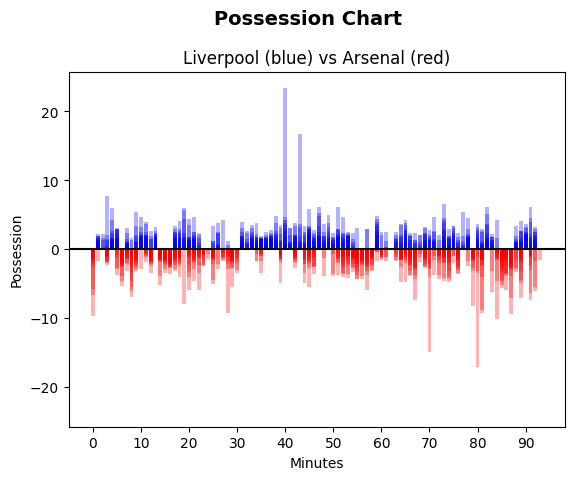

In [14]:
# Now we can begin to visualise our daata, we can begin by creating the figure and subplot
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('Possession Chart', fontsize=14, fontweight='bold')
ax.set_title(df2['team.name'][0] + ' (blue) vs ' + df2['team.name'][1] + ' (red)')
ax.set_xlabel('Minutes')
ax.set_ylabel('Possession')

# Plot the bar chart for possession duration
plt.bar(df2.minute, df2.duration, color=np.where(df2.duration > 0, 'b', 'r'), alpha=0.3)

# Draw a horizontal line at y=0
plt.axhline(0, color='black')

# Set x-axis ticks
tot_min = df2.minute.max()
plt.xticks(np.arange(0, tot_min + 1, step=10))  # Adjusted to include the max minute

# Set symmetric y-axis limits with padding
max_duration = df2['duration'].abs().max()  # Find the max absolute duration value
padding = max_duration * 0.1                # 10% padding based on the max duration value
plt.ylim(-max_duration - padding, max_duration + padding)  # Set y-limits with padding

# Show the plot
plt.show()
